### Manipulate tensors with Numpy

In [1]:
import numpy as np

In [14]:
# 0D tensor
x0 = np.array(12)
print('x0:', x0.ndim)

# 1D tensor
x1 = np.array([1, 2, 3])
print('x1:', x1.ndim)

# 2D tensor
x2 = np.array([[1, 2, 3],[4, 5, 6],[7, 8, 9]])
print('x2:', x2.ndim)

# 3D tensor
x3 = np.array([[[1, 2, 3],[4, 5, 6],[7, 8, 9]],
               [[1, 2, 3],[4, 5, 6],[7, 8, 9]]])
print('x3:', x3.ndim)

('x0:', 0)
('x1:', 1)
('x2:', 2)
('x3:', 3)


In [15]:
# The MNIST dataset
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

Using TensorFlow backend.


In [19]:
print train_images.ndim
print train_images.shape
print train_images.dtype

3
(60000, 28, 28)
uint8


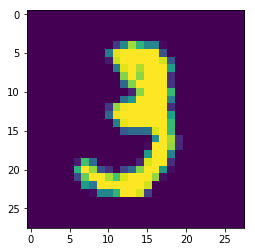

3


In [23]:
# Show the 10th sample of the MNIST data
%matplotlib inline
import matplotlib.pyplot as plt
plt.imshow(train_images[10])
plt.show()
print train_labels[10]

In [26]:
# Use slicing to get a smaller part of the dataset
train_1 = train_images[0:10, :, :]
print train_1.shape

# Extract a batch of 128 samples
batch = train_images[:128]
print batch.shape

(10, 28, 28)
(128, 28, 28)


In [31]:
# RELU operation defined from scratch

def naive_relu(x):
    assert len(x.shape) == 2
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] = max(x[i, j], 0)
    return x

x = np.array([[1,-1,-2],[-2,3,4]])

print naive_relu(x)

[[1 0 0]
 [0 3 4]]


In [44]:
import numpy as np

from keras.datasets import mnist
from keras import models
from keras import layers
from keras.utils import to_categorical

In [38]:
# Download the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [39]:
# The training data has 60000 samples (28x28 images)
print train_images.shape
# Each image has a label (0 to 9)
print len(train_labels)
train_labels

(60000, 28, 28)
60000


array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [40]:
# The test data has 10000 samples (28x28 images)
print test_images.shape
# Each image has a label (0 to 9)
print len(test_labels)
test_labels

(10000, 28, 28)
10000


array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [41]:
# Define the network (one layer of 512 units and an output of 10 units)
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

In [42]:
# Compile the network and define the optimizer, loss and performance metric
network.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [43]:
# Reshape the samples (each sample has 28*28 'features') and normalize between 0-1
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [45]:
# Convert the 0-9 labels to arrays of 0s and 1s of size 10
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

print train_labels

[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


In [47]:
# Perform the training of the network
network.fit(train_images, train_labels, epochs=10, batch_size=128)

Epoch 1/10
60000/60000 [==============================] - 4s 70us/step - loss: 0.0281 - acc: 0.9915
Epoch 2/10
60000/60000 [==============================] - 4s 69us/step - loss: 0.0213 - acc: 0.9938
Epoch 3/10
60000/60000 [==============================] - 4s 70us/step - loss: 0.0167 - acc: 0.9951
Epoch 4/10
60000/60000 [==============================] - 4s 70us/step - loss: 0.0129 - acc: 0.9964
Epoch 5/10
60000/60000 [==============================] - 4s 71us/step - loss: 0.0100 - acc: 0.9972
Epoch 6/10
60000/60000 [==============================] - 4s 71us/step - loss: 0.0081 - acc: 0.9979
Epoch 7/10
60000/60000 [==============================] - 4s 70us/step - loss: 0.0061 - acc: 0.9984
Epoch 8/10
60000/60000 [==============================] - 4s 70us/step - loss: 0.0049 - acc: 0.9987
Epoch 9/10
60000/60000 [==============================] - 4s 70us/step - loss: 0.0039 - acc: 0.9990
Epoch 10/10
60000/60000 [==============================] - 4s 74us/step - loss: 0.0031 - acc: 0.9992

In [48]:
# Evaluate the performance of the model on the test data
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

10000/10000 [==============================] - 1s 52us/step
('test_acc:', 0.9826)
